# Data Analysis 5
## In this analysis we will find the ID, date and total due for instances of sales orders made during September 2011 where the total due is over 1000, by descending order of total due

First we connect to the cloud database, run an SQL query for the necessary data and store it in a pandas dataframe.
As the only necessary table for this analysis is the ``SalesOrderHeader`` table, this query will be simple.

In [1]:
import pandas.io.sql as sqlio
import psycopg2
from config import config

params = config()
conn = psycopg2.connect(**params)
sql = 'select * from \"SalesOrderHeader\";'
df1 = sqlio.read_sql_query(sql, conn)
conn.close()

Let's inspect the dataframe.

In [2]:
from IPython.display import display

display(df1.head(3))

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43659,PO522145787,10-4020-000676,...,16281,105041Vi84182,None,20565.6206,1971.5149,616.0984,23153.2339,None,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43660,PO18850127500,10-4020-000117,...,5618,115213Vi29411,None,1294.2529,124.2483,38.8276,1457.3288,None,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43661,PO18473189620,10-4020-000442,...,1346,85274Vi6854,4,32726.4786,3153.7696,985.5530,36865.8012,None,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07


Next we will filter the dataframe. We will drop any row in which the total due is equal or less to 1000, and we will also drop all rows for orders made outside of Septempber 2011. In the process we will also drop columns that are not relevant to our analysis.

In [3]:
df2 = df1.drop(df1[(df1['OrderDate'].dt.year != 2011) | (df1['OrderDate'].dt.month != 9) | (df1['TotalDue'] < 1000)].index)[['SalesOrderID', 'OrderDate', 'TotalDue']].reset_index(drop = True)

This is how our dataframe looks like at the moment.

In [4]:
display(df2.head(3))

,SalesOrderID,OrderDate,TotalDue
0,44324,2011-09-01,3953.9884
1,44325,2011-09-01,3729.3640
2,44326,2011-09-01,3953.9884


Finally, we will sort the dataframe descending order of total due.

In [5]:
df3 = df2.sort_values('TotalDue', ascending = False).reset_index(drop = True)
display(df3)

,SalesOrderID,OrderDate,TotalDue
0,44324,2011-09-01,3953.9884
1,44419,2011-09-17,3953.9884
2,44433,2011-09-20,3953.9884
3,44432,2011-09-20,3953.9884
4,44431,2011-09-19,3953.9884
...,...,...,...
133,44378,2011-09-10,3729.3640
134,44376,2011-09-10,3729.3640
135,44337,2011-09-04,3729.3640
136,44364,2011-09-08,3729.3640


Just for fun, let's plot our data to a line chart.

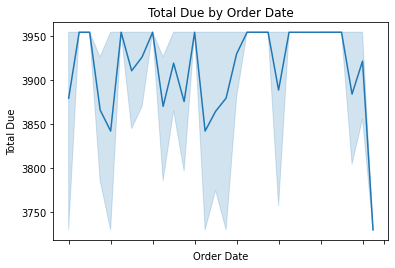

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lineplot(x = 'OrderDate', y = 'TotalDue', data = df3)
g.set(title = 'Total Due by Order Date', xlabel = 'Order Date', ylabel = 'Total Due', xticklabels = [])
plt.show()

Finally, let's save the resulting dataframe to a ``.csv`` file.

In [7]:
df3.to_csv('results/analysis5.csv')